<a href="https://colab.research.google.com/github/goverdhana-srihitha/file1/blob/master/Assignmnet_for_20_06_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Name : G sai Srihitha 
### Pin no : 221710402014
### assignment for 20-06-2020



Read the dataset from the below path:
https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/cities.csv

- Check the data types and summary statistics of the dataset

- Select random columns as Series and random columns as dataframe

- Convert the data type of integer cols to float and float cols to integer

- Visualize the missing values through heatmap

- Dropt the duplicate values if found any

- Get the row which has highest population

- Calculate the mean of the population total grouped by States and sort the population total in ascending order and plot a horizontal bar chart for that.

- Create a dataframe of five cities which have lowest population

- Create a dataframe of  five cities which have highest  population

- Concatenate the top five and bottom five cities based on the population


In [59]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [60]:
df = pd.read_csv("/content/cities.csv")
df.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,103319,58347,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,92433,49347,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,83955,46295,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,125985,71470,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,101292,56203,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


### Check the data types and summary statistics of the dataset



In [38]:
df.dtypes

name_of_city                       object
state_code                          int64
state_name                         object
dist_code                           int64
population_total                    int64
population_male                     int64
population_female                   int64
0-6_population_total                int64
0-6_population_male                 int64
0-6_population_female               int64
literates_total                     int64
literates_male                      int64
literates_female                    int64
sex_ratio                           int64
child_sex_ratio                     int64
effective_literacy_rate_total     float64
effective_literacy_rate_male      float64
effective_literacy_rate_female    float64
location                           object
total_graduates                     int64
male_graduates                      int64
female_graduates                    int64
dtype: object

In [7]:
df.dtypes.value_counts()

int64      16
object      3
float64     3
dtype: int64

In [8]:
df.describe()   # or df.describe(include=['number'])

,state_code,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,total_graduates,male_graduates,female_graduates
count,493.000000,493.000000,4.930000e+02,4.930000e+02,4.930000e+02,4.930000e+02,493.000000,493.000000,4.930000e+02,4.930000e+02,4.930000e+02,493.000000,493.000000,493.000000,493.000000,493.000000,4.930000e+02,4.930000e+02,4.930000e+02
mean,18.643002,16.782961,4.481124e+05,2.343468e+05,2.137656e+05,4.709285e+04,24849.527383,22243.320487,3.461527e+05,1.894384e+05,1.567143e+05,930.294118,902.332657,85.131460,89.920162,79.967181,6.620236e+04,3.771556e+04,2.848680e+04
std,9.297168,15.566131,1.033228e+06,5.487786e+05,4.848622e+05,1.050279e+05,55535.310272,49523.241379,8.220952e+05,4.534753e+05,3.690677e+05,55.849106,49.794689,6.186345,5.377492,7.577825,1.778187e+05,9.849574e+04,7.951556e+04
min,1.000000,1.000000,1.000360e+05,5.020100e+04,4.512600e+04,6.547000e+03,3406.000000,3107.000000,5.699800e+04,3.475100e+04,2.224700e+04,700.000000,762.000000,49.510000,52.270000,46.450000,2.532000e+03,1.703000e+03,8.290000e+02
25%,9.000000,7.000000,1.261420e+05,6.638400e+04,6.041100e+04,1.363900e+04,7221.000000,6457.000000,9.768700e+04,5.357800e+04,4.391400e+04,890.000000,868.000000,81.750000,87.280000,75.800000,1.527700e+04,9.289000e+03,6.114000e+03
50%,19.000000,13.000000,1.841330e+05,9.665500e+04,8.776800e+04,1.944000e+04,10342.000000,9172.000000,1.413290e+05,7.590600e+04,6.383600e+04,922.000000,903.000000,85.970000,91.180000,80.920000,2.395900e+04,1.404900e+04,9.558000e+03
75%,27.000000,21.000000,3.490330e+05,1.750550e+05,1.700260e+05,3.794500e+04,19982.000000,17954.000000,2.679000e+05,1.455480e+05,1.235030e+05,971.000000,942.000000,89.330000,93.400000,85.400000,5.036700e+04,2.787200e+04,2.086600e+04
max,35.000000,99.000000,1.247845e+07,6.736815e+06,5.741632e+06,1.209275e+06,647938.000000,561337.000000,1.023759e+07,5.727774e+06,4.509812e+06,1093.000000,1185.000000,98.800000,99.300000,98.310000,2.221137e+06,1.210040e+06,1.011097e+06


In [9]:
df.describe(include =['O'])

,name_of_city,state_name,location
count,493,493,493
unique,492,29,490
top,Aurangabad,UTTAR PRADESH,"22.6500518,88.3423199"
freq,2,63,2


In [10]:
df.describe(include='all')

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
count,493,493.000000,493,493.000000,4.930000e+02,4.930000e+02,4.930000e+02,4.930000e+02,493.000000,493.000000,4.930000e+02,4.930000e+02,4.930000e+02,493.000000,493.000000,493.000000,493.000000,493.000000,493,4.930000e+02,4.930000e+02,4.930000e+02
unique,492,NaN,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,490,NaN,NaN,NaN
top,Aurangabad,NaN,UTTAR PRADESH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"22.6500518,88.3423199",NaN,NaN,NaN
freq,2,NaN,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
mean,NaN,18.643002,NaN,16.782961,4.481124e+05,2.343468e+05,2.137656e+05,4.709285e+04,24849.527383,22243.320487,3.461527e+05,1.894384e+05,1.567143e+05,930.294118,902.332657,85.131460,89.920162,79.967181,NaN,6.620236e+04,3.771556e+04,2.848680e+04
std,NaN,9.297168,NaN,15.566131,1.033228e+06,5.487786e+05,4.848622e+05,1.050279e+05,55535.310272,49523.241379,8.220952e+05,4.534753e+05,3.690677e+05,55.849106,49.794689,6.186345,5.377492,7.577825,NaN,1.778187e+05,9.849574e+04,7.951556e+04
min,NaN,1.000000,NaN,1.000000,1.000360e+05,5.020100e+04,4.512600e+04,6.547000e+03,3406.000000,3107.000000,5.699800e+04,3.475100e+04,2.224700e+04,700.000000,762.000000,49.510000,52.270000,46.450000,NaN,2.532000e+03,1.703000e+03,8.290000e+02
25%,NaN,9.000000,NaN,7.000000,1.261420e+05,6.638400e+04,6.041100e+04,1.363900e+04,7221.000000,6457.000000,9.768700e+04,5.357800e+04,4.391400e+04,890.000000,868.000000,81.750000,87.280000,75.800000,NaN,1.527700e+04,9.289000e+03,6.114000e+03
50%,NaN,19.000000,NaN,13.000000,1.841330e+05,9.665500e+04,8.776800e+04,1.944000e+04,10342.000000,9172.000000,1.413290e+05,7.590600e+04,6.383600e+04,922.000000,903.000000,85.970000,91.180000,80.920000,NaN,2.395900e+04,1.404900e+04,9.558000e+03
75%,NaN,27.000000,NaN,21.000000,3.490330e+05,1.750550e+05,1.700260e+05,3.794500e+04,19982.000000,17954.000000,2.679000e+05,1.455480e+05,1.235030e+05,971.000000,942.000000,89.330000,93.400000,85.400000,NaN,5.036700e+04,2.787200e+04,2.086600e+04


### Select random columns as Series and random columns as dataframe


In [11]:
df.shape

(493, 22)

In [12]:
# Selecting random row from dataset 
df.sample()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
340,Nangloi Jat,7,NCT OF DELHI,7,205497,110068,95429,28274,15215,13059,147805,85448,62357,867,858,83.4,90.08,75.7,"28.6841206,77.0632942",12692,7779,4913


In [13]:
df.sample(n=2,random_state=2)

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
428,Shamli,9,UTTAR PRADESH,2,107233,57236,49997,13724,7634,6090,76650,43469,33181,874,798,81.97,87.64,75.57,"29.4507575,77.3152116",13343,7245,6098
232,Jamnagar,24,GUJARAT,10,529308,276202,253106,51106,27452,23654,394919,216330,178589,916,862,82.58,86.97,77.83,"22.4707019,70.05773",52049,29513,22536


In [14]:
df.tail().sample(n=1,axis = 1)

,dist_code
488,12
489,9
490,8
491,3
492,14


### Convert the data type of integer cols to float and float cols to integer

In [16]:
# Integer to Float 
df['state_code']=df['state_code'].astype(float)
df.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3.0,PUNJAB,9,145238,76840,68398,15870,8587,7283,103319,58347,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27.0,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,92433,49347,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28.0,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,83955,46295,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20.0,JHARKHAND,24,173988,91495,82493,23042,12063,10979,125985,71470,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28.0,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,101292,56203,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


In [50]:
# Float to integer 
df=df['effective_literacy_rate_male'].astype(int)
df

0      85
1      94
2      88
3      89
4      76
       ..
488    88
489    91
490    97
491    89
492    95
Name: effective_literacy_rate_male, Length: 493, dtype: int64

In [55]:
# Converting mutliple cols from int to float
dfint=df.select_dtypes(include='int64')
dfint=dfint.astype(float)
dfint.head()

,state_code,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,total_graduates,male_graduates,female_graduates
0,3.0,9.0,145238.0,76840.0,68398.0,15870.0,8587.0,7283.0,103319.0,58347.0,44972.0,890.0,848.0,16287.0,8612.0,7675.0
1,27.0,7.0,112293.0,58256.0,54037.0,11810.0,6186.0,5624.0,92433.0,49347.0,43086.0,928.0,909.0,8863.0,5269.0,3594.0
2,28.0,1.0,117388.0,59232.0,58156.0,13103.0,6731.0,6372.0,83955.0,46295.0,37660.0,982.0,947.0,10565.0,6797.0,3768.0
3,20.0,24.0,173988.0,91495.0,82493.0,23042.0,12063.0,10979.0,125985.0,71470.0,54515.0,902.0,910.0,19225.0,12189.0,7036.0
4,28.0,21.0,166537.0,82743.0,83794.0,18406.0,9355.0,9051.0,101292.0,56203.0,45089.0,1013.0,968.0,11902.0,7871.0,4031.0


In [56]:
# Mutlipul cols from float to int 
dffloat = df.select_dtypes(include='float64')
dffloat=dffloat.astype(int)
dffloat.head()

,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female
0,79,85,73
1,91,94,89
2,80,88,72
3,83,89,76
4,68,76,60


### Visualize the missing values through heatmap

In [51]:
df.isnull().sum()

0

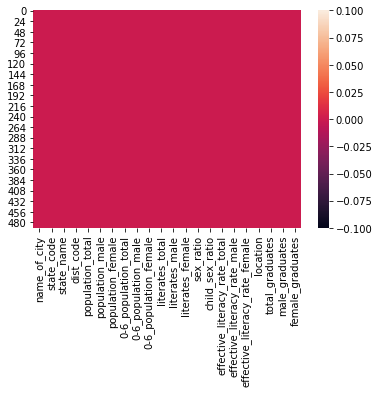

In [58]:
sns.heatmap(df.isnull())

### Dropt the duplicate values if found any

In [61]:
data = pd.DataFrame(df)
for i in data.columns :
  data.drop_duplicates(i,inplace=True)
data  

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,103319,58347,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,92433,49347,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,83955,46295,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,125985,71470,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
6,Agra,9,UTTAR PRADESH,15,1574542,849771,724771,186516,105279,81237,880530,503805,376725,853,772,63.44,67.67,58.54,"27.1766701,78.0080745",185813,106082,79731
9,Aizawl,15,MIZORAM,3,291822,143803,148019,35147,17667,17480,253588,125256,128332,1029,989,98.80,99.30,98.31,"23.727107,92.7176389",26832,14900,11932
10,Ajmer,8,RAJASTHAN,21,542580,278786,263794,59437,31547,27890,422913,230586,192327,946,884,87.53,93.26,81.53,"26.4498954,74.6399163",77989,42454,35535
14,Alappuzha,32,KERALA,11,174164,83888,90276,15434,7934,7500,153269,74454,78815,1076,945,96.56,98.03,95.21,"9.4980667,76.3388484",22263,9900,12363
18,Ambala,6,HARYANA,2,196216,103533,92683,19645,10713,8932,155780,85004,70776,895,834,88.23,91.58,84.51,"30.3781788,76.7766974",34943,17809,17134
30,Anantnag,1,JAMMU & KASHMIR,14,108505,56030,52475,18056,9633,8423,71408,39591,31817,937,874,78.95,85.33,72.23,"33.7311255,75.1487007",12666,7291,5375


### Get the row which has highest population

In [62]:
df[df.population_total==max(df['population_total'])]

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
185,Greater Mumbai,27,MAHARASHTRA,99,12478447,6736815,5741632,1139146,599007,540139,10237586,5727774,4509812,852,902,90.28,93.32,86.7,"19.0760,72.8777",1802371,964964,837407


### Calculate the mean of the population total grouped by States and sort the population total in ascending order and plot a horizontal bar chart for that.

In [63]:
df2=df.groupby(['state_name'])['population_total'].mean()
df2=pd.DataFrame(df2)
df2.sort_values(by='population_total')

,population_total
state_name,
ANDAMAN & NICOBAR ISLANDS,100608.000000
NAGALAND,123777.000000
MEGHALAYA,143007.000000
HIMACHAL PRADESH,169758.000000
UTTARAKHAND,223399.500000
BIHAR,258250.615385
MANIPUR,264986.000000
PUDUCHERRY,270900.500000
MIZORAM,291822.000000


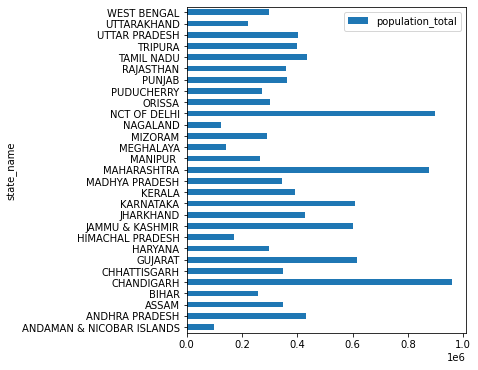

In [65]:
df2.plot.barh(figsize=(5,6))

### Create a dataframe of five cities which have lowest population

In [66]:
df1 = df.sort_values(by='population_total').head()
df1

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
332,Nagda,23,MADHYA PRADESH,18,100036,51410,48626,11053,5840,5213,72618,40765,31853,946,893,81.61,89.46,73.37,"23.4454599,75.4169918",9844,5707,4137
53,Banswara,8,RAJASTHAN,27,100128,51240,48888,12244,6602,5642,76438,41404,35034,954,855,86.98,92.76,81.01,"23.5461394,74.4349761",13852,7837,6015
211,Hinganghat,27,MAHARASHTRA,8,100416,51881,48535,9681,5175,4506,85599,45728,39871,936,871,94.34,97.91,90.56,"20.5505728,78.8411405",11256,6684,4572
136,Datia,23,MADHYA PRADESH,5,100466,52931,47535,12218,6553,5665,71071,40482,30589,898,864,80.54,87.29,73.06,"25.6653262,78.4609393",12717,7960,4757
376,Port Blair,35,ANDAMAN & NICOBAR ISLANDS,3,100608,53247,47361,9358,4852,4506,81908,44908,37000,889,929,89.76,92.79,86.34,"11.6233774,92.7264828",12420,6717,5703


### Create a dataframe of five cities which have highest population

In [67]:
df2 = df.sort_values(by='population_total',ascending=False).head()
df2

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
185,Greater Mumbai,27,MAHARASHTRA,99,12478447,6736815,5741632,1139146,599007,540139,10237586,5727774,4509812,852,902,90.28,93.32,86.70,"19.0760,72.8777",1802371,964964,837407
141,Delhi,7,NCT OF DELHI,99,11007835,5871362,5136473,1209275,647938,561337,8583105,4776490,3806615,875,866,87.60,91.44,83.20,"28.7041,77.1025",2221137,1210040,1011097
72,Bengaluru,29,KARNATAKA,18,8425970,4401299,4024671,862493,444639,417854,6775942,3664959,3110983,914,940,89.59,92.63,86.25,"12.9716,77.5946",1591163,908363,682800
184,Greater Hyderabad,28,ANDHRA PRADESH,99,6809970,3500802,3309168,725816,373794,352022,5047705,2688111,2359594,945,942,82.96,85.96,79.79,"17.3850,78.4867",1164149,685402,478747
7,Ahmadabad,24,GUJARAT,7,5570585,2935869,2634716,589076,317917,271159,4464303,2459823,2004480,897,853,89.62,93.96,84.81,"23.022505,72.5713621",769858,435267,334591


### concatenate 

In [68]:
pd.concat([df1,df2])

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
332,Nagda,23,MADHYA PRADESH,18,100036,51410,48626,11053,5840,5213,72618,40765,31853,946,893,81.61,89.46,73.37,"23.4454599,75.4169918",9844,5707,4137
53,Banswara,8,RAJASTHAN,27,100128,51240,48888,12244,6602,5642,76438,41404,35034,954,855,86.98,92.76,81.01,"23.5461394,74.4349761",13852,7837,6015
211,Hinganghat,27,MAHARASHTRA,8,100416,51881,48535,9681,5175,4506,85599,45728,39871,936,871,94.34,97.91,90.56,"20.5505728,78.8411405",11256,6684,4572
136,Datia,23,MADHYA PRADESH,5,100466,52931,47535,12218,6553,5665,71071,40482,30589,898,864,80.54,87.29,73.06,"25.6653262,78.4609393",12717,7960,4757
376,Port Blair,35,ANDAMAN & NICOBAR ISLANDS,3,100608,53247,47361,9358,4852,4506,81908,44908,37000,889,929,89.76,92.79,86.34,"11.6233774,92.7264828",12420,6717,5703
185,Greater Mumbai,27,MAHARASHTRA,99,12478447,6736815,5741632,1139146,599007,540139,10237586,5727774,4509812,852,902,90.28,93.32,86.70,"19.0760,72.8777",1802371,964964,837407
141,Delhi,7,NCT OF DELHI,99,11007835,5871362,5136473,1209275,647938,561337,8583105,4776490,3806615,875,866,87.60,91.44,83.20,"28.7041,77.1025",2221137,1210040,1011097
72,Bengaluru,29,KARNATAKA,18,8425970,4401299,4024671,862493,444639,417854,6775942,3664959,3110983,914,940,89.59,92.63,86.25,"12.9716,77.5946",1591163,908363,682800
184,Greater Hyderabad,28,ANDHRA PRADESH,99,6809970,3500802,3309168,725816,373794,352022,5047705,2688111,2359594,945,942,82.96,85.96,79.79,"17.3850,78.4867",1164149,685402,478747
7,Ahmadabad,24,GUJARAT,7,5570585,2935869,2634716,589076,317917,271159,4464303,2459823,2004480,897,853,89.62,93.96,84.81,"23.022505,72.5713621",769858,435267,334591
